<a href="https://colab.research.google.com/github/AnikaitLakhotia/Machine-Learning/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [ ]:
# Fix the number of words to consider as features(max_features), maximum length of text(max_len) and batch size.
max_features = 10000
maxlen = 3000
batch_size = 32

In [ ]:
#Separate training and test sets
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
# Pad sequences to ensure same length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
# Callbacks
reduce_on_plateau = keras.callbacks.ReduceLROnPlateau(
 monitor='val_loss',
 factor=0.1,
 patience=3)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
 restore_best_weights=True)

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# Model architecture
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(64, kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Define compilation 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
# Model training
history = model.fit(x_train, y_train,
                    epochs=7,
                    validation_split=0.3,
                    batch_size=200, 
                    callbacks=[tensorboard_cb,early_stopping_cb,reduce_on_plateau])

Epoch 1/7
88/88 [==============================] - 35s 304ms/step - loss: 1.1936 - acc: 0.5735 - val_loss: 0.8074 - val_acc: 0.6961 - lr: 0.0010
Epoch 2/7
88/88 [==============================] - 24s 269ms/step - loss: 0.5181 - acc: 0.8197 - val_loss: 0.4603 - val_acc: 0.8333 - lr: 0.0010
Epoch 3/7
88/88 [==============================] - 22s 250ms/step - loss: 0.3188 - acc: 0.8986 - val_loss: 0.4735 - val_acc: 0.8075 - lr: 0.0010
Epoch 4/7
88/88 [==============================] - 20s 229ms/step - loss: 0.2659 - acc: 0.9178 - val_loss: 0.3429 - val_acc: 0.8680 - lr: 0.0010
Epoch 5/7
88/88 [==============================] - 20s 231ms/step - loss: 0.2087 - acc: 0.9415 - val_loss: 0.3611 - val_acc: 0.8668 - lr: 0.0010
Epoch 6/7
88/88 [==============================] - 18s 207ms/step - loss: 0.1808 - acc: 0.9536 - val_loss: 0.5460 - val_acc: 0.7373 - lr: 0.0010
Epoch 7/7
88/88 [==============================] - 18s 203ms/step - loss: 0.3189 - acc: 0.8928 - val_loss: 0.4432 - val_acc: 0.861

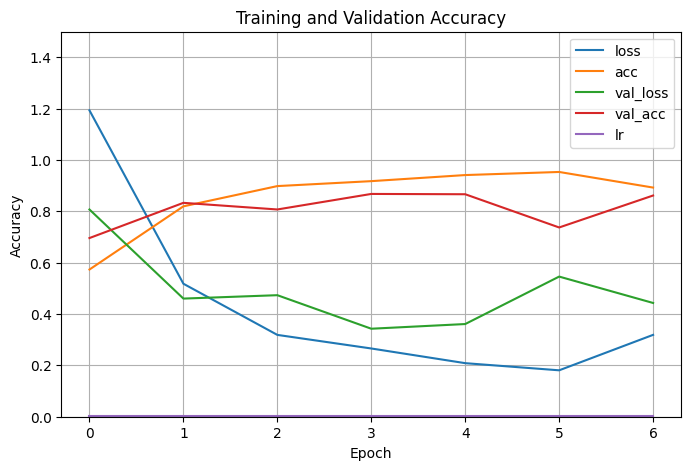

In [ ]:
# Plot accuracy
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()